<a href="https://colab.research.google.com/github/tejasp2311/AQI_Week2/blob/main/AQI_Prediction_Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Air Quality Index (AQI) Prediction Project

This notebook presents an approach to predicting Air Quality Index (AQI) using machine learning. Multiple regression algorithms are evaluated to select the best model for deployment. The workflow follows industry standards for data science projects.

## 1. Load the dataset


In [ ]:
import pandas as pd
# Load the dataset
df = pd.read_csv('city_day.csv')
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


## 2. Explore the Data

In [ ]:
import numpy as np
# Data summary
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [ ]:
# Drop rows with missing AQI
df = df.dropna(subset=['AQI'])

# Select relevant features
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'AQI_Bucket']
df = df[features + ['AQI']]

# Encode categorical features
df['AQI_Bucket'] = df['AQI_Bucket'].astype('category').cat.codes

# Fill missing values with median
df = df.fillna(df.median(numeric_only=True))

## 3. Data Preprocessing

In [ ]:
# Feature matrix and target
X = df.drop('AQI', axis=1)
y = df['AQI']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42, verbosity=0),
    'SVR': SVR()
}

results = {}
for name, model in models.items():
    if name in ['SVR', 'XGBoost']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = {'R2': r2, 'MSE': mse}
results_df = pd.DataFrame(results).T.sort_values('R2', ascending=False)

print('Model Comparison:')
display(results_df)

selected_model = results_df.index[0]
print(f'Selected Model for Deployment: {selected_model}')

Model Comparison:


,R2,MSE
Random Forest,0.946179,985.518484
XGBoost,0.945896,990.697022
Gradient Boosting,0.938182,1131.945480
Decision Tree,0.900807,1816.326241
Linear Regression,0.816339,3363.022532
SVR,0.672080,6004.542233


Selected Model for Deployment: Random Forest


## 4. Model Training and Evaluation
We will train and evaluate six different regression algorithms.

In [ ]:
# Model selection
best_model_name = max(results, key=lambda k: results[k]['R2'])
best_model = models[best_model_name]
print(f'Best Model: {best_model_name}')
print(f"R² Score: {results[best_model_name]['R2']:.4f}")

Best Model: Random Forest
R² Score: 0.9462


## 5. Model Selection
Select the model with the highest R² score for deployment.

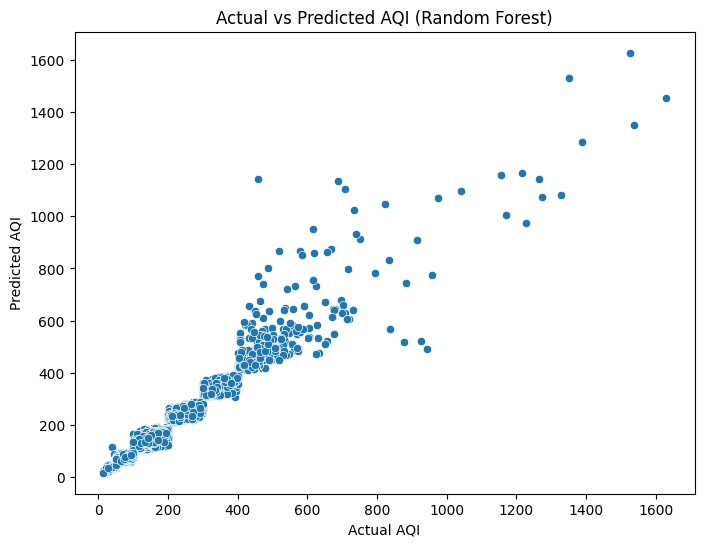

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

if best_model_name in ['SVR', 'XGBoost']:
    y_pred_best = best_model.predict(X_test_scaled)
else:
    y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_best)
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title(f'Actual vs Predicted AQI ({best_model_name})')
plt.show()

## 6. Save the Best Model and Scaler for Deployment

In [ ]:
import joblib
joblib.dump(best_model, 'aqi_best_model.pkl')
joblib.dump(scaler, 'aqi_feature_scaler.pkl')

['aqi_feature_scaler.pkl']